In [1]:
import pandas as pd
import numpy as np

[Industry Data](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410002201)

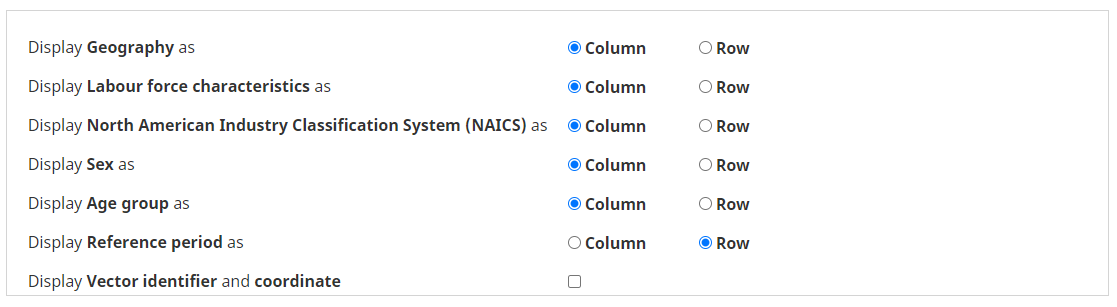

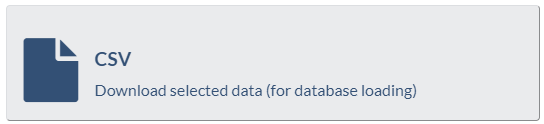

In [2]:
statcan_df = pd.read_csv("1410002201_databaseLoadingData.csv")

In [3]:
statcan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   REF_DATE                                               20130 non-null  object 
 1   GEO                                                    20130 non-null  object 
 2   DGUID                                                  20130 non-null  object 
 3   Labour force characteristics                           20130 non-null  object 
 4   North American Industry Classification System (NAICS)  20130 non-null  object 
 5   Sex                                                    20130 non-null  object 
 6   Age group                                              20130 non-null  object 
 7   UOM                                                    20130 non-null  object 
 8   UOM_ID                                        

In [4]:
statcan_df.describe(include='all')

,REF_DATE,GEO,DGUID,Labour force characteristics,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
count,20130,20130,20130,20130,20130,20130,20130,20130,20130.0,20130,20130.0,20130,20130,17464.000000,2666,0.0,0.0,20130.0
unique,61,1,1,2,28,2,3,1,NaN,1,NaN,330,330,NaN,1,NaN,NaN,NaN
top,2018-08,Canada,2016A000011124,Unemployment,Real estate and rental and leasing [53],Males,15 to 24 years,Persons,NaN,thousands,NaN,v19652433,1.5.10.2.2,NaN,x,NaN,NaN,NaN
freq,330,20130,20130,10248,732,10065,6710,20130,NaN,20130,NaN,61,61,NaN,2666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN,3.0,NaN,NaN,158.138078,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,459.592159,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN,3.0,NaN,NaN,1.500000,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN,3.0,NaN,NaN,6.700000,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN,3.0,NaN,NaN,30.950000,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN,3.0,NaN,NaN,129.000000,NaN,NaN,NaN,1.0


In [5]:
statcan_df.drop(["GEO", "DGUID", "SYMBOL", "TERMINATED", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "DECIMALS"], axis=1, inplace=True)

In [6]:
statcan_df.head(2)

,REF_DATE,Labour force characteristics,North American Industry Classification System (NAICS),Sex,Age group,VALUE
0,2015-09,Employment,Goods-producing sector,Males,15 to 24 years,322.0
1,2015-10,Employment,Goods-producing sector,Males,15 to 24 years,310.5


In [7]:
statcan_df.columns = ["date", "stat_type", "industry", "sex", "age_group", "val"]

In [8]:
statcan_df.head(2)

,date,stat_type,industry,sex,age_group,val
0,2015-09,Employment,Goods-producing sector,Males,15 to 24 years,322.0
1,2015-10,Employment,Goods-producing sector,Males,15 to 24 years,310.5


In [9]:
statcan_df["date"] = pd.to_datetime(statcan_df["date"])

In [10]:
statcan_df["stat_type"].value_counts()

Unemployment    10248
Employment       9882
Name: stat_type, dtype: int64

In [11]:
statcan_df["sex"] = statcan_df["sex"].str.lower()

In [12]:
statcan_df["industry"].unique()

array(['Goods-producing sector', 'Agriculture [111-112, 1100, 1151-1152]',
       'Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]',
       'Forestry and logging and support activities for forestry [113, 1153]',
       'Fishing, hunting and trapping [114]',
       'Mining, quarrying, and oil and gas extraction [21, 2100]',
       'Utilities [22]', 'Construction [23]', 'Manufacturing [31-33]',
       'Durables [321, 327, 331-339]', 'Non-durables [311-316, 322-326]',
       'Services-producing sector',
       'Wholesale and retail trade [41, 44-45]', 'Wholesale trade [41]',
       'Retail trade [44-45]', 'Transportation and warehousing [48-49]',
       'Finance, insurance, real estate, rental and leasing [52, 53]',
       'Finance and insurance [52]',
       'Real estate and rental and leasing [53]',
       'Professional, scientific and technical services [54]',
       'Business, building and other support services [55, 56]',
       'Educational services [61]'

In [13]:
statcan_df["industry"] = statcan_df["industry"].str.lower()

In [14]:
statcan_df["industry"] = statcan_df["industry"].str.replace('[^a-zA-Z\-\s]', '')

In [15]:
statcan_df.head(2)

,date,stat_type,industry,sex,age_group,val
0,2015-09-01,Employment,goods-producing sector,males,15 to 24 years,322.0
1,2015-10-01,Employment,goods-producing sector,males,15 to 24 years,310.5


In [16]:
statcan_df["age_group"].value_counts()

15 to 24 years       6710
25 to 54 years       6710
55 years and over    6710
Name: age_group, dtype: int64

In [17]:
statcan_df["val"].dtype

dtype('float64')

In [18]:
employment_df = statcan_df[statcan_df["stat_type"] == "Employment"].copy()
unemployment_df = statcan_df[statcan_df["stat_type"] == "Unemployment"].copy()

In [19]:
employment_df.drop("stat_type", axis = 1, inplace=True)
employment_df.reset_index(drop=True, inplace=True)
employment_df.head()

,date,industry,sex,age_group,val
0,2015-09-01,goods-producing sector,males,15 to 24 years,322.0
1,2015-10-01,goods-producing sector,males,15 to 24 years,310.5
2,2015-11-01,goods-producing sector,males,15 to 24 years,300.9
3,2015-12-01,goods-producing sector,males,15 to 24 years,300.0
4,2016-01-01,goods-producing sector,males,15 to 24 years,265.3


In [20]:
unemployment_df.drop("stat_type", axis = 1, inplace=True)
unemployment_df.reset_index(drop=True, inplace=True)
unemployment_df.head()

,date,industry,sex,age_group,val
0,2015-09-01,goods-producing sector,males,15 to 24 years,31.8
1,2015-10-01,goods-producing sector,males,15 to 24 years,30.2
2,2015-11-01,goods-producing sector,males,15 to 24 years,32.0
3,2015-12-01,goods-producing sector,males,15 to 24 years,40.4
4,2016-01-01,goods-producing sector,males,15 to 24 years,47.7


In [21]:
employment_df.to_csv("employment.csv")
unemployment_df.to_csv("unemployment.csv")